Calculate axes for all views

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from Point_311 import pt313utils

import matplotlib.pyplot as plt

from statistics import mean
import math

Define img folders for different fruit types

In [2]:
sphere_path = "./data/oranges/obj0001"
oblate_path = "./data/tomatoes/obj0001"
prolate_path = "./data/mandarins/obj0001"    # Fixme: Not sure if mandarin is prolate model

fruits_types = [sphere_path, oblate_path, prolate_path]
fruit_types_by_index = ["sphere", "oblate", "prolate"]

In [3]:
results_dict = {
    "sphere": {
        "semi_axes_a_all": [],
        "semi_axes_b_all": [],
        "principal_axes": {
            "sphere": (0, 0),
            "oblate": (0, 0),
            "prolate": (0, 0)
        }
    },
    "prolate": {
        "semi_axes_a_all": [],
        "semi_axes_b_all": [],
        "principal_axes": {
            "sphere": (0, 0),
            "oblate": (0, 0),
            "prolate": (0, 0)
        }
    },
    "oblate": {
        "semi_axes_a_all": [],  # Major axes
        "semi_axes_b_all": [],  # Minor axes
        "principal_axes": {
            "sphere": (0, 0), # (A, B)
            "oblate": (0, 0), # (A, B)
            "prolate": (0, 0) # (A, B)
        }
    }
}

In [4]:
for index, fruit_type in enumerate(fruits_types): # Test with all fruit types
    current_fruit_type_name = fruit_types_by_index[index]
    image_files = [file for file in os.listdir(fruit_type)]  # Get list of all img names inside of folder

    for image_name in image_files:
        file_path = os.path.join(fruit_type, image_name)
        print(file_path)
        img = cv2.imread(file_path)
        mask = pt313utils.create_mask_from_img(img)
        ellipse = pt313utils.calculate_ellipse_from_mask(mask)
        _, axes_length, _ = ellipse
        minor_axis_length, major_axis_length = axes_length
        results_dict[current_fruit_type_name]["semi_axes_a_all"].append(major_axis_length)
        results_dict[current_fruit_type_name]["semi_axes_b_all"].append(minor_axis_length)

./data/oranges/obj0001/im09.png
./data/oranges/obj0001/im08.png
./data/oranges/obj0001/im06.png
./data/oranges/obj0001/im12.png
./data/oranges/obj0001/im13.png
./data/oranges/obj0001/im07.png
./data/oranges/obj0001/im11.png
./data/oranges/obj0001/im05.png
./data/oranges/obj0001/im04.png
./data/oranges/obj0001/im10.png
./data/oranges/obj0001/im14.png
./data/oranges/obj0001/im00.png
./data/oranges/obj0001/im01.png
./data/oranges/obj0001/im15.png
./data/oranges/obj0001/im03.png
./data/oranges/obj0001/im02.png
./data/tomatoes/obj0001/im09.png
./data/tomatoes/obj0001/im08.png
./data/tomatoes/obj0001/im06.png
./data/tomatoes/obj0001/im12.png
./data/tomatoes/obj0001/im13.png
./data/tomatoes/obj0001/im07.png
./data/tomatoes/obj0001/im11.png
./data/tomatoes/obj0001/im05.png
./data/tomatoes/obj0001/im04.png
./data/tomatoes/obj0001/im10.png
./data/tomatoes/obj0001/im14.png
./data/tomatoes/obj0001/im00.png
./data/tomatoes/obj0001/im01.png
./data/tomatoes/obj0001/im15.png
./data/tomatoes/obj0001/im

In [5]:
# CHECK RESULTS DICT
print(results_dict["sphere"], "\n")
print(results_dict["oblate"], "\n")
print(results_dict["prolate"], "\n")

{'semi_axes_a_all': [285.3653869628906, 285.1866149902344, 285.9267578125, 286.63897705078125, 285.966552734375, 286.6387939453125, 285.8709411621094, 283.6547546386719, 283.0968017578125, 286.64599609375, 285.18280029296875, 281.37432861328125, 283.4338684082031, 285.8868103027344, 283.06182861328125, 284.2428283691406], 'semi_axes_b_all': [274.4981994628906, 274.8949279785156, 258.84466552734375, 271.7203674316406, 269.9371032714844, 261.916748046875, 274.7830810546875, 266.3143615722656, 271.4136962890625, 276.122314453125, 265.9461669921875, 273.1302490234375, 272.46484375, 262.8699951171875, 275.6820068359375, 275.26812744140625], 'principal_axes': {'sphere': (0, 0), 'oblate': (0, 0), 'prolate': (0, 0)}} 

{'semi_axes_a_all': [315.70245361328125, 312.49542236328125, 316.5052795410156, 311.4043884277344, 312.7715148925781, 313.3410339355469, 315.66290283203125, 317.2655944824219, 319.7476501464844, 324.06988525390625, 312.59625244140625, 313.24786376953125, 314.1517333984375, 312.1

In [6]:
# CALCULATE PRINCIPAL AXES WITH ALL FORMULAS TO COMPARE

for index, fruit_type in enumerate(fruit_types_by_index): # Test with all fruit types
    a_all_views = results_dict[fruit_type]["semi_axes_a_all"]
    b_all_views = results_dict[fruit_type]["semi_axes_b_all"]

    # FOR SPHERE FORMULA
    axes_sum = [(x + y) / 2 for x, y in zip(a_all_views, b_all_views)]
    sphere_axe = mean(axes_sum)
    results_dict[fruit_type]["principal_axes"]["sphere"] = (sphere_axe, sphere_axe)

    # FOR OBLATE FORMULA
    results_dict[fruit_type]["principal_axes"]["oblate"] = (mean(a_all_views), min(b_all_views))  # (A, B)

    # FOR PROLATE FORMULA
    results_dict[fruit_type]["principal_axes"]["prolate"] = (max(a_all_views), mean(b_all_views))  # (A, B)

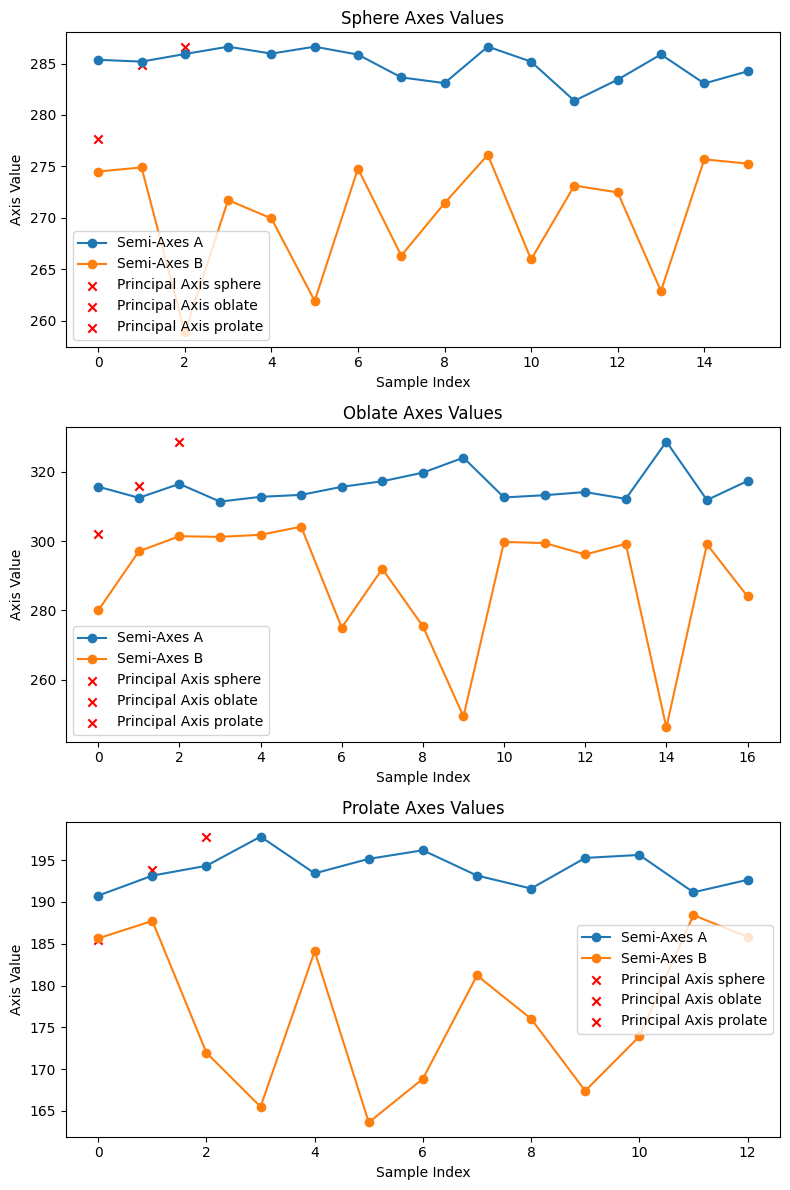

In [7]:
 # TODO: ADD A IMAGE OF THE FRUIT WITH THE PRINCPAL AXES FOUND WITH EACH FORMULA TO SEE HOW THEY DIFFER FROM EACH OTHER


# PLOT RESULTS FIXME: FIND OUT WHAT THESE GRAPHS MEAN AND IF THEY PROVIDE ANY USEFUL INFO, OTHERWISE REMOVE THEM
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot axis values for each type
for i, fruit_type in enumerate(["sphere", "oblate", "prolate"]):
    ax = axes[i]
    semi_axes_a = results_dict[fruit_type]["semi_axes_a_all"]
    semi_axes_b = results_dict[fruit_type]["semi_axes_b_all"]
    principal_axes = results_dict[fruit_type]["principal_axes"]

    # Plot semi_axes_a and semi_axes_b values
    x_values = np.arange(len(semi_axes_a))
    ax.plot(x_values, semi_axes_a, label="Semi-Axes A", marker='o')
    ax.plot(x_values, semi_axes_b, label="Semi-Axes B", marker='o')

    # Highlight the principal axes values with a different marker
    for key, value in principal_axes.items():
        if value != (0, 0):
            index = list(principal_axes.keys()).index(key)
            ax.scatter(index, value[0], color='red', marker='x', label=f"Principal Axis {key}")

    ax.set_title(f"{fruit_type.capitalize()} Axes Values")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Axis Value")
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()